# Import Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read training dataset
train_data = pd.read_csv('training_set_features.csv')
missing_train_data = train_data.isnull().mean()
missing_train_data = missing_train_data.sort_values(ascending=False)
train_data.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [3]:
train_labels = pd.read_csv('training_set_labels.csv')
train_labels.value_counts('h1n1_vaccine')

h1n1_vaccine
0    21033
1     5674
dtype: int64

In [4]:
train_labels.value_counts('seasonal_vaccine')

seasonal_vaccine
0    14272
1    12435
dtype: int64

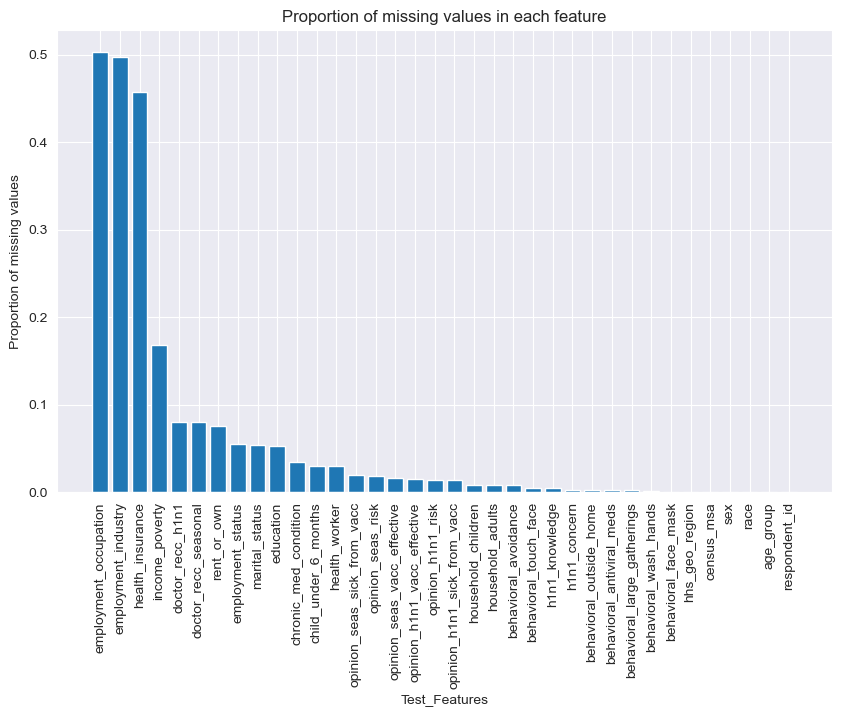

In [5]:
# Read the test dataset
test_data = pd.read_csv('test_set_features.csv')
missing_test_data = test_data.isnull().mean()
missing_test_data = missing_test_data.sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
plt.title('Proportion of missing values in each feature')
plt.xlabel('Test_Features')
plt.ylabel('Proportion of missing values')
plt.bar(missing_test_data.index, missing_test_data.values)
plt.show()

 # Data Processing

In [6]:
# Training dataset processing
train_data = pd.read_csv('training_set_features.csv')
train_labels = pd.read_csv('training_set_labels.csv')

# Missing value handling
# Fill missing values
train_data['health_insurance'] = train_data['health_insurance'].fillna('Unknown')
train_data['employment_industry'] = train_data['employment_industry'].fillna('Unknown')
train_data['employment_occupation'] = train_data['employment_occupation'].fillna('Unknown')
train_data['income_poverty'] = train_data['income_poverty'].replace({
    'Below Poverty': 1,
    '<= $75,000, Above Poverty': 2,
    '> $75,000': 3
})
median_income = train_data['income_poverty'].median()
train_data['income_poverty'] = train_data['income_poverty'].fillna(median_income)
train_data['doctor_recc_seasonal'].fillna(train_data['doctor_recc_seasonal'].mode()[0], inplace=True)
train_data['doctor_recc_h1n1'].fillna(train_data['doctor_recc_h1n1'].mode()[0], inplace=True)
freq = train_data['rent_or_own'].value_counts()
most_common = freq.index[0]
train_data['rent_or_own'].fillna(most_common, inplace=True)
freq1 = train_data['employment_status'].value_counts()
most_common1 = freq1.index[0]
train_data['employment_status'].fillna(most_common1, inplace=True)
str_features = ['marital_status', 'education', 'chronic_med_condition', 'child_under_6_months', 'health_worker',
                'opinion_seas_sick_from_vacc', 'opinion_seas_risk', 'opinion_seas_vacc_effective',
                'opinion_h1n1_sick_from_vacc', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'household_children',
                'household_adults', 'behavioral_touch_face', 'h1n1_knowledge','employment_industry','employment_occupation']
for feature in str_features:
    mode_val = train_data[feature].mode()[0]
    train_data[feature] = train_data[feature].fillna(mode_val)

# Delete rows with missing values
drop_features = ['h1n1_concern', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_antiviral_meds',
                 'behavioral_antiviral_meds', 'behavioral_face_mask', 'behavioral_avoidance', 'behavioral_wash_hands']
train_data = train_data.dropna(subset=drop_features)

# One-hot
cat_columns = ['health_insurance', 'age_group', 'education', 'race', 'sex', 'marital_status', 'employment_status',
               'rent_or_own', 'census_msa', 'hhs_geo_region','employment_industry','employment_occupation']
onehot_train_data = pd.get_dummies(train_data[cat_columns])
new_train_features = pd.concat([train_data.drop(cat_columns, axis=1), onehot_train_data], axis=1)

new_train_all_data = new_train_features.merge(train_labels, on='respondent_id')
train_features = new_train_all_data.drop(['h1n1_vaccine', 'seasonal_vaccine'], axis=1)
train_labels = new_train_all_data[['respondent_id','h1n1_vaccine', 'seasonal_vaccine']]


In [7]:
# Test dataset processing
test_data =pd.read_csv('test_set_features.csv')

# Missing value handling
# Fill missing values
test_data['health_insurance'] = test_data['health_insurance'].fillna('Unknown')
test_data['employment_industry'] = test_data['employment_industry'].fillna('Unknown')
test_data['employment_occupation'] = test_data['employment_occupation'].fillna('Unknown')
test_data['income_poverty'] = test_data['income_poverty'].replace({
    'Below Poverty': 1,
    '<= $75,000, Above Poverty': 2,
    '> $75,000': 3
})
median_income = test_data['income_poverty'].median()
test_data['income_poverty'] = test_data['income_poverty'].fillna(median_income)
test_data['doctor_recc_seasonal'].fillna(test_data['doctor_recc_seasonal'].mode()[0], inplace=True)
test_data['doctor_recc_h1n1'].fillna(test_data['doctor_recc_h1n1'].mode()[0], inplace=True)
freq = test_data['rent_or_own'].value_counts()
most_common = freq.index[0]
test_data['rent_or_own'].fillna(most_common, inplace=True)
freq1 = test_data['employment_status'].value_counts()
most_common1 = freq1.index[0]
test_data['employment_status'].fillna(most_common1, inplace=True)
str_features = ['marital_status', 'education', 'chronic_med_condition', 'child_under_6_months', 'health_worker',
                'opinion_seas_sick_from_vacc', 'opinion_seas_risk', 'opinion_seas_vacc_effective',
                'opinion_h1n1_sick_from_vacc', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'household_children',
                'household_adults', 'behavioral_touch_face', 'h1n1_knowledge','employment_industry','employment_occupation',
                'h1n1_concern', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_antiviral_meds',
                'behavioral_antiviral_meds', 'behavioral_face_mask', 'behavioral_avoidance', 'behavioral_wash_hands'
                ]
for feature in str_features:
    mode_val = test_data[feature].mode()[0]
    test_data[feature] = test_data[feature].fillna(mode_val)

# One-hot
cat_columns = ['health_insurance', 'age_group', 'education', 'race', 'sex', 'marital_status', 'employment_status',
               'rent_or_own', 'census_msa', 'hhs_geo_region','employment_industry','employment_occupation']
onehot_test_data = pd.get_dummies(test_data[cat_columns])
new_test_data = pd.concat([test_data.drop(cat_columns, axis=1), onehot_test_data], axis=1)


# Normalization

In [8]:
from sklearn.preprocessing import StandardScaler

# Create a normalizer
scaler = StandardScaler()
features_to_scale = train_features.drop('respondent_id', axis=1).columns

# Fit and normalize transformation on training data
train_features_scaled = train_features.copy()
train_features_scaled[features_to_scale] = scaler.fit_transform(train_features[features_to_scale])
train_features_scaled = train_features_scaled.drop('respondent_id', axis=1)

# Replace old training data with new normalized training data
train_features = train_features_scaled

In [9]:
from sklearn.preprocessing import StandardScaler

# Create a normalizer
scaler = StandardScaler()
features_to_scale = new_test_data.drop('respondent_id', axis=1).columns

# Fit and normalize transformation on test data
scaler.fit(train_features[features_to_scale])
new_test_data_scaled = new_test_data.copy()
new_test_data_scaled[features_to_scale] = scaler.transform(new_test_data[features_to_scale])
new_test_data_scaled = new_test_data_scaled.drop('respondent_id', axis=1)

# Replace old training data with new normalized training data
new_test_data = new_test_data_scaled


In [10]:
# import pandas as pd
# from sklearn.utils import resample
# # 读取数据
# data = new_train_all_data[['respondent_id', 'h1n1_vaccine','seasonal_vaccine']]
#
# # 按照h1n1_vaccine标签进行拆分
# class_0 = data[data['h1n1_vaccine'] == 0]
# class_1 = data[data['h1n1_vaccine'] == 1]
#
# # 欠采样操作，使得class_0与class_1数据量平衡
# class_0_undersampled = resample(class_0, replace=False, n_samples=len(class_1))
#
# # 合并欠采样后的数据
# undersampled_data = pd.concat([class_0_undersampled, class_1])
#
#
# # 打乱数据顺序
# undersampled_data = undersampled_data.sample(frac=1, random_state=42)
#
# new_train_data = new_train_features.merge(undersampled_data, on='respondent_id')
# train_features = new_train_data.drop(['h1n1_vaccine', 'seasonal_vaccine'], axis=1)
# train_labels = new_train_data[['h1n1_vaccine', 'seasonal_vaccine']]

In [11]:
from sklearn.utils import resample

def undersample_data(X, y):
    # Combine features and label
    data = pd.concat([X, y], axis=1)

    # Split data based on label
    class_0 = data[y['h1n1_vaccine'] == 0]
    class_1 = data[y['h1n1_vaccine'] == 1]

    # Perform undersampling
    class_0_undersampled = resample(class_0, replace=False, n_samples=len(class_1))

    # Concatenate undersampled class_0 and class_1
    undersampled_data = pd.concat([class_0_undersampled, class_1])

    # Shuffle data
    undersampled_data = undersampled_data.sample(frac=1, random_state=42)

    # Split undersampled_data back into features and label
    X_undersampled = undersampled_data.drop(['respondent_id', 'h1n1_vaccine'], axis=1)
    y_undersampled = undersampled_data[['respondent_id', 'h1n1_vaccine']]

    return X_undersampled, y_undersampled

# Model Training

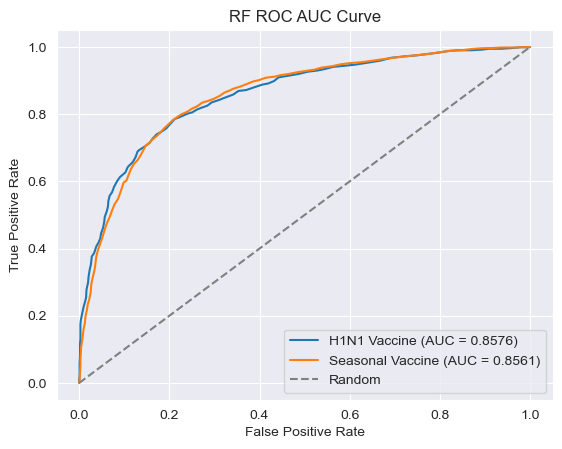

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
# 'h1n1_vaccine' undersampling and training
y_h1n1 = train_labels[['respondent_id', 'h1n1_vaccine']]
train_features_undersampled, y_h1n1_undersampled = undersample_data(train_features, y_h1n1)

# Split into training and validation sets
X_train_h1n1, X_val_h1n1, y_train_h1n1, y_val_h1n1 = train_test_split(train_features_undersampled, y_h1n1_undersampled['h1n1_vaccine'], test_size=0.2, random_state=42)

# Train the model
tree_h1n1 = RandomForestClassifier()
tree_h1n1.fit(X_train_h1n1, y_train_h1n1)

# Predict probabilities and compute ROC and AUC
y_h1n1_predict = tree_h1n1.predict_proba(X_val_h1n1)[:,1]
fpr1, tpr1, _ = roc_curve(y_val_h1n1, y_h1n1_predict)
auc1 = roc_auc_score(y_val_h1n1, y_h1n1_predict)

# 'seasonal_vaccine' training
y_seasonal = train_labels['seasonal_vaccine']
X_train_seasonal, X_val_seasonal, y_train_seasonal, y_val_seasonal = train_test_split(train_features, y_seasonal, test_size=0.2, random_state=42)

# Train the model
tree_seasonal = RandomForestClassifier()
tree_seasonal.fit(X_train_seasonal, y_train_seasonal)

# Predict probabilities and compute ROC and AUC
y_seasonal_predict = tree_seasonal.predict_proba(X_val_seasonal)[:,1]
fpr2, tpr2, _ = roc_curve(y_val_seasonal, y_seasonal_predict)
auc2 = roc_auc_score(y_val_seasonal, y_seasonal_predict)

# Draw the ROC curve
plt.figure()
plt.plot(fpr1, tpr1, label=f'H1N1 Vaccine (AUC = {auc1:.4f})')
plt.plot(fpr2, tpr2, label=f'Seasonal Vaccine (AUC = {auc2:.4f})')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RF ROC AUC Curve')
plt.legend(loc='lower right')
plt.show()


In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter combinations to try
param_grid = {
    'max_depth': [10, 15, 20],
    'min_samples_leaf': [1, 2, 3],
    'n_estimators': [100, 200, 300]
}

# Initialize the GridSearchCV object with random_state set
grid_h1n1 = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_seasonal = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)

grid_h1n1.fit(X_train_h1n1, y_train_h1n1)
grid_seasonal.fit(X_train_seasonal, y_train_seasonal)

# Output the best parameters
print("Best parameters RF for h1n1 data: ", grid_h1n1.best_params_)
print("Best parameters RF for seasonal data: ", grid_seasonal.best_params_)

Best parameters RF for h1n1 data:  {'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 300}
Best parameters RF for seasonal data:  {'max_depth': 20, 'min_samples_leaf': 3, 'n_estimators': 300}


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# 定义要尝试的参数组合
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# 初始化GridSearchCV对象
grid_h1n1 = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_seasonal = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, n_jobs=-1)

# 在训练数据上进行网格搜索
grid_h1n1.fit(X_train_h1n1, y_train_h1n1)
grid_seasonal.fit(X_train_seasonal, y_train_seasonal)

# 输出最佳参数
print("Best parameters LG for h1n1 data:", grid_h1n1.best_params_)
print("Best parameters LG for seasonal data:", grid_seasonal.best_params_)

/Users/easonpeng/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/easonpeng/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/easonpeng/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/easonpeng/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/easonpeng/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/easonpeng/anaconda3/lib/python3.10/sit

Best parameters LG for h1n1 data: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best parameters LG for seasonal data: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


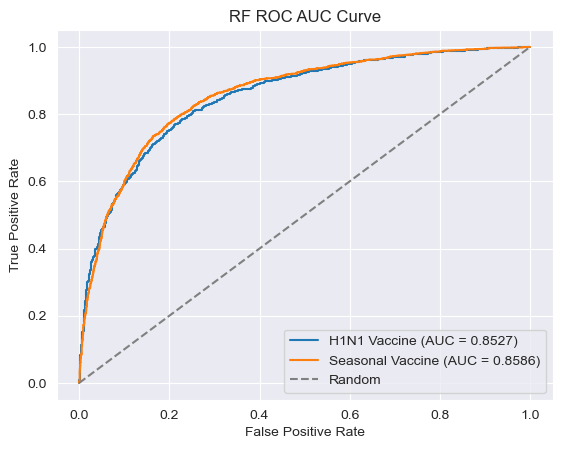

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
# 'h1n1_vaccine' undersampling and training
y_h1n1 = train_labels[['respondent_id', 'h1n1_vaccine']]
train_features_undersampled, y_h1n1_undersampled = undersample_data(train_features, y_h1n1)

# Split into training and validation sets
X_train_h1n1, X_val_h1n1, y_train_h1n1, y_val_h1n1 = train_test_split(train_features_undersampled, y_h1n1_undersampled['h1n1_vaccine'], test_size=0.2, random_state=42)

# Train the model
tree_h1n1 = RandomForestClassifier(max_depth = 20,min_samples_leaf = 2,n_estimators = 300)
tree_h1n1.fit(X_train_h1n1, y_train_h1n1)

# Predict probabilities and compute ROC and AUC
y_h1n1_predict = tree_h1n1.predict_proba(X_val_h1n1)[:,1]
fpr1, tpr1, _ = roc_curve(y_val_h1n1, y_h1n1_predict)
auc1 = roc_auc_score(y_val_h1n1, y_h1n1_predict)

# 'seasonal_vaccine' training
y_seasonal = train_labels['seasonal_vaccine']
X_train_seasonal, X_val_seasonal, y_train_seasonal, y_val_seasonal = train_test_split(train_features, y_seasonal, test_size=0.2, random_state=42)

# Train the model
tree_seasonal = RandomForestClassifier(max_depth = 20,min_samples_leaf = 3,n_estimators = 300)
tree_seasonal.fit(X_train_seasonal, y_train_seasonal)

# Predict probabilities and compute ROC and AUC
y_seasonal_predict = tree_seasonal.predict_proba(X_val_seasonal)[:,1]
fpr2, tpr2, _ = roc_curve(y_val_seasonal, y_seasonal_predict)
auc2 = roc_auc_score(y_val_seasonal, y_seasonal_predict)

# Draw the ROC curve
plt.figure()
plt.plot(fpr1, tpr1, label=f'H1N1 Vaccine (AUC = {auc1:.4f})')
plt.plot(fpr2, tpr2, label=f'Seasonal Vaccine (AUC = {auc2:.4f})')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RF ROC AUC Curve')
plt.legend(loc='lower right')
plt.show()


# Model Prediction

In [16]:
X_test_all = new_test_data

y_h1n1_predict = tree_h1n1.predict_proba(X_test_all)[:,1]
y_seasonal_predict = tree_seasonal.predict_proba(X_test_all)[:,1]
results = pd.DataFrame({ 'h1n1_vaccine': y_h1n1_predict , 'seasonal_vaccine': y_seasonal_predict})
# Save as csv file
results.to_csv('result/predictions_RF_ALL_F_pyz.csv', index=False)

# Ablation experiment

In [23]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.base import clone
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.under_sampling import RandomUnderSampler

# Define an ablation experiment
def ablation_experiment_v2(feature_groups, train_features, train_labels, model,k):
    best_auc_h1n1 = 0
    best_auc_seasonal = 0
    best_h1n1_model = None
    best_seasonal_model = None

    # Create a figure with 3 subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    for i, (group_name, feature_group) in enumerate(feature_groups.items()):
        print(f'Performing ablation experiment by excluding {group_name}...')

        # Remove the feature group from training data
        features_to_remove = feature_group
        features_filtered = train_features.drop(features_to_remove, axis=1)

        # Initialize cross-validation
        skf = StratifiedKFold(n_splits=k, random_state=42, shuffle=True)

        for target_label, color in zip(['h1n1_vaccine', 'seasonal_vaccine'], ['b', 'r']):
            print(f'Training and evaluating model for {target_label}...')
            aucs = []
            accuracies = []
            precisions = []
            recalls = []
            f1s = []
            for train_index, val_index in skf.split(features_filtered, train_labels[target_label]):

                X_train, X_val = features_filtered.iloc[train_index], features_filtered.iloc[val_index]
                y_train, y_val = train_labels[target_label].iloc[train_index], train_labels[target_label].iloc[val_index]

                # Perform under-sampling if target_label is 'h1n1_vaccine'
                if target_label == 'h1n1_vaccine':
                    undersampler = RandomUnderSampler(random_state=42)
                    X_train, y_train = undersampler.fit_resample(X_train, y_train)


                # Train the model
                model.fit(X_train, y_train)

                # Predict probabilities
                probabilities = model.predict_proba(X_val)
                predictions = model.predict(X_val)

                accuracies.append(accuracy_score(y_val, predictions))
                precisions.append(precision_score(y_val, predictions))
                recalls.append(recall_score(y_val, predictions))
                f1s.append(f1_score(y_val, predictions))

                # Compute ROC curve and ROC area
                fpr, tpr, _ = roc_curve(y_val, probabilities[:, 1])
                roc_auc = auc(fpr, tpr)
                aucs.append(roc_auc)


            mean_auc = np.mean(aucs)
            mean_accuracy = np.mean(accuracies)
            mean_precision = np.mean(precisions)
            mean_recall = np.mean(recalls)
            mean_f1 = np.mean(f1s)
            print(f'Average ROC AUC score for {target_label}: {mean_auc:.3f}')
            print(f'Average accuracy for {target_label}: {mean_accuracy:.3f}')
            print(f'Average precision for {target_label}: {mean_precision:.3f}')
            print(f'Average recall for {target_label}: {mean_recall:.3f}')
            print(f'Average F1 score for {target_label}: {mean_f1:.3f}')

            # Update the best model if current model is better
            if target_label == 'h1n1_vaccine' and mean_auc > best_auc_h1n1:
                best_auc_h1n1 = mean_auc
                best_h1n1_model = model
            elif target_label == 'seasonal_vaccine' and mean_auc > best_auc_seasonal:
                best_auc_seasonal = mean_auc
                best_seasonal_model = model

            # Set the current subplot to be the active one
            plt.sca(axes[i])

            # Plot ROC curve
            plt.plot(fpr, tpr, color=color, lw=2, label=f'ROC curve for {target_label} (area = {roc_auc:.3f})')

        # Plot settings
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic (ROC) Curve\nExcluding {group_name}')
        plt.legend(loc="lower right")

    # Show the plot
    plt.tight_layout()  # Adjusts subplot params so that subplots are nicely fit in the figure.
    plt.show()

    return best_h1n1_model, best_seasonal_model


In [18]:
# Respondents' personal backgrounds
personal_backgrounds = [
    'age_group',
    'education',
    'race',
    'sex',
    'income_poverty',
    'marital_status',
    'rent_or_own',
    'employment_status',
    'hhs_geo_region',
    'census_msa',
    'household_adults',
    'household_children',
    'employment_industry',
    'employment_occupation',
    'health_worker',
    'health_insurance',
    'chronic_med_condition',
    'child_under_6_months'
]

# Respondents' perceptions of vaccines
perceptions_of_vaccines = [
    'h1n1_concern',
    'h1n1_knowledge',
    'doctor_recc_h1n1',
    'doctor_recc_seasonal',
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc'
]

# Respondents' daily behaviors
daily_behaviors = [
    'behavioral_antiviral_meds',
    'behavioral_avoidance',
    'behavioral_face_mask',
    'behavioral_wash_hands',
    'behavioral_large_gatherings',
    'behavioral_outside_home',
    'behavioral_touch_face'
]

Performing ablation experiment by excluding Respondents' personal backgrounds...
Training and evaluating model for h1n1_vaccine...
Average ROC AUC score for h1n1_vaccine: 0.822
Average accuracy for h1n1_vaccine: 0.767
Average precision for h1n1_vaccine: 0.469
Average recall for h1n1_vaccine: 0.728
Average F1 score for h1n1_vaccine: 0.571
Training and evaluating model for seasonal_vaccine...
Average ROC AUC score for seasonal_vaccine: 0.825
Average accuracy for seasonal_vaccine: 0.753
Average precision for seasonal_vaccine: 0.742
Average recall for seasonal_vaccine: 0.720
Average F1 score for seasonal_vaccine: 0.731
Performing ablation experiment by excluding Respondents' perceptions of vaccines...
Training and evaluating model for h1n1_vaccine...
Average ROC AUC score for h1n1_vaccine: 0.743
Average accuracy for h1n1_vaccine: 0.658
Average precision for h1n1_vaccine: 0.352
Average recall for h1n1_vaccine: 0.722
Average F1 score for h1n1_vaccine: 0.473
Training and evaluating model for 

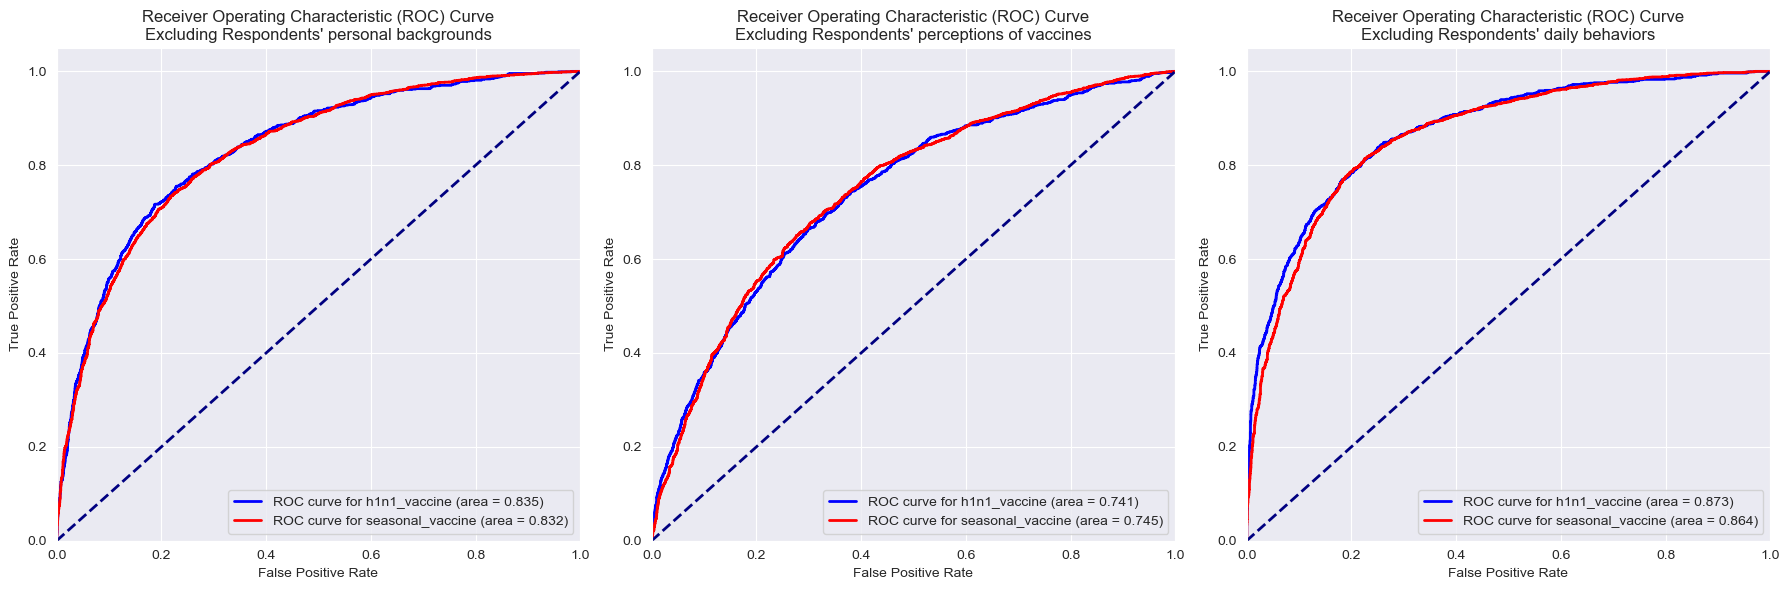

In [24]:
# One-hot encoded columns
onehot_columns = onehot_train_data.columns.tolist()

# Replace the one-hot encoded features in the original feature list with the encoded columns
personal_backgrounds = [col for col in personal_backgrounds if col not in cat_columns] + [col for col in onehot_columns if col.startswith(tuple(personal_backgrounds))]
perceptions_of_vaccines = [col for col in perceptions_of_vaccines if col not in cat_columns] + [col for col in onehot_columns if col.startswith(tuple(perceptions_of_vaccines))]
daily_behaviors = [col for col in daily_behaviors if col not in cat_columns] + [col for col in onehot_columns if col.startswith(tuple(daily_behaviors))]

feature_groups = {
    "Respondents' personal backgrounds": personal_backgrounds,
    "Respondents' perceptions of vaccines": perceptions_of_vaccines,
    "Respondents' daily behaviors": daily_behaviors
}
# Invoke the ablation experiment method
model1 = RandomForestClassifier(max_depth=15, min_samples_leaf=2, n_estimators=300, random_state=42)
best_h1n1_model, best_seasonal_model = ablation_experiment_v2(feature_groups, train_features, train_labels, model1, 5)

Performing ablation experiment by excluding Respondents' personal backgrounds...
Training and evaluating model for h1n1_vaccine...
Average ROC AUC score for h1n1_vaccine: 0.823
Average accuracy for h1n1_vaccine: 0.770
Average precision for h1n1_vaccine: 0.474
Average recall for h1n1_vaccine: 0.720
Average F1 score for h1n1_vaccine: 0.572
Training and evaluating model for seasonal_vaccine...
Average ROC AUC score for seasonal_vaccine: 0.821
Average accuracy for seasonal_vaccine: 0.749
Average precision for seasonal_vaccine: 0.744
Average recall for seasonal_vaccine: 0.703
Average F1 score for seasonal_vaccine: 0.723
Performing ablation experiment by excluding Respondents' perceptions of vaccines...
Training and evaluating model for h1n1_vaccine...
Average ROC AUC score for h1n1_vaccine: 0.740
Average accuracy for h1n1_vaccine: 0.668
Average precision for h1n1_vaccine: 0.356
Average recall for h1n1_vaccine: 0.692
Average F1 score for h1n1_vaccine: 0.470
Training and evaluating model for 

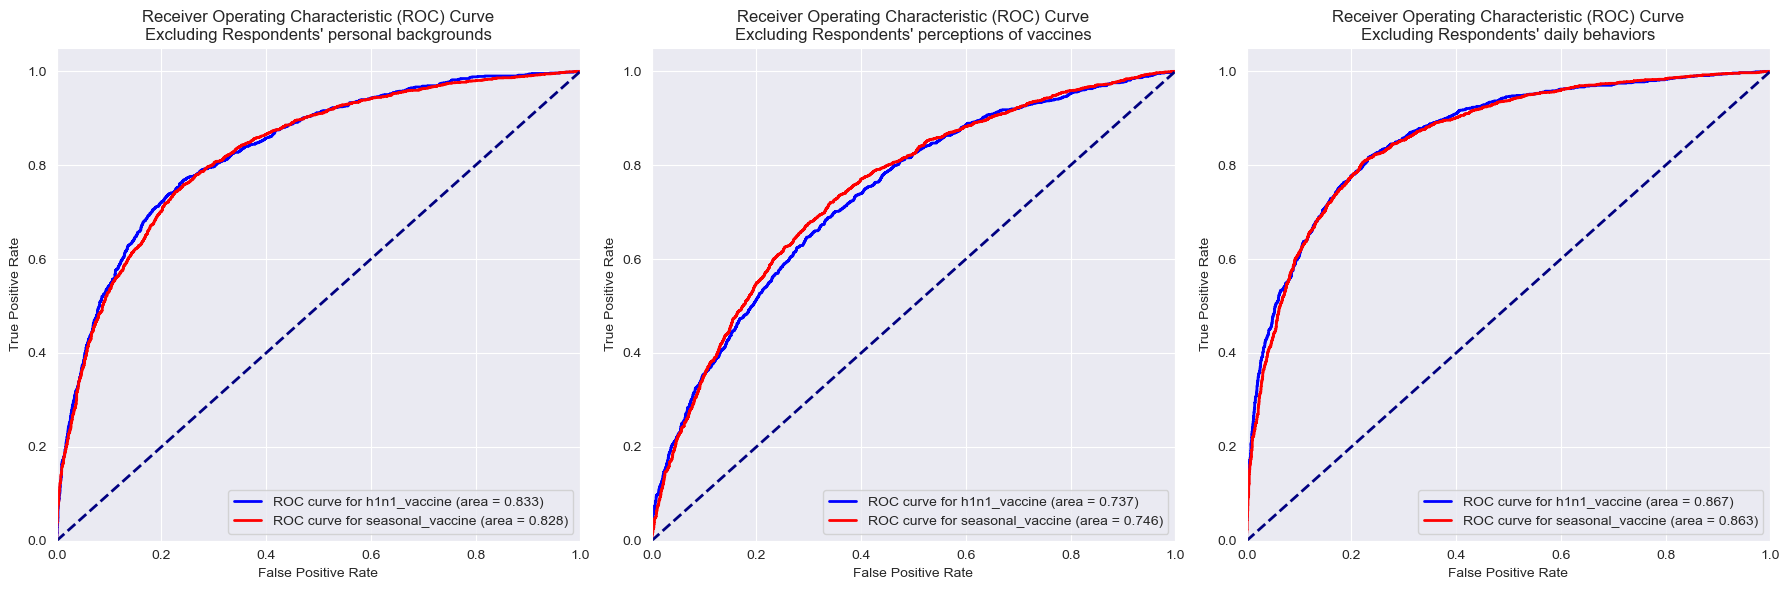

In [25]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression(C=1.0, penalty='l2', solver='liblinear')
best_h1n1_model2, best_seasonal_model2 = ablation_experiment_v2(feature_groups, train_features, train_labels, logreg_model, 5)

# Best model predictions

In [ ]:
X_test_AE = new_test_data.drop(daily_behaviors, axis =1)
y_h1n1_predict_AE = best_h1n1_model.predict_proba(X_test_AE)[:,1]
y_seasonal_predict_AE = best_seasonal_model.predict_proba(X_test_AE)[:,1]
results = pd.DataFrame({'respondent_id': X_test_AE['respondent_id'], 'h1n1_vaccine': y_h1n1_predict_AE , 'seasonal_vaccine': y_seasonal_predict_AE})
# Output the result as csv file
results.to_csv('result/predictions_ablation_experiment_pyz.csv', index=False)